<a href="https://colab.research.google.com/github/DebanshuCS/DeepLearning-KC-HousePrice/blob/main/DL_HousePrice_KC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data_path="/content/Copy of kc_house_data.csv"

In [3]:
data = pd.read_csv(data_path)

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
train1 = data.drop(['id', 'price','date'],axis=1) #X
train1.shape

(21613, 18)

In [8]:
labels = data['price'] #y

In [9]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =3456)

In [10]:
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)

(19451, 18) (19451,) (2162, 18) (2162,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

#Create your base model
model = Sequential()

#Add layer with 8 nodes
model.add(Dense(8,activation='relu')) 

# Add 50% Dropout
#model.add(Dropout(0.5))

#added node
model.add(Dense(5,activation='relu'))

#model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))

#model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

import tensorflow as tf

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
152/152 [==============================] - 3s 4ms/step - loss: 426639785984.0000 - val_loss: 424939094016.0000
Epoch 2/400
152/152 [==============================] - 0s 3ms/step - loss: 426626023424.0000 - val_loss: 424910553088.0000
Epoch 3/400
152/152 [==============================] - 0s 3ms/step - loss: 426558128128.0000 - val_loss: 424780103680.0000
Epoch 4/400
152/152 [==============================] - 0s 3ms/step - loss: 426318528512.0000 - val_loss: 424406843392.0000
Epoch 5/400
152/152 [==============================] - 0s 3ms/step - loss: 425756196864.0000 - val_loss: 423626604544.0000
Epoch 6/400
152/152 [==============================] - 0s 3ms/step - loss: 424696184832.0000 - val_loss: 422252609536.0000
Epoch 7/400
152/152 [==============================] - 0s 3ms/step - loss: 422951452672.0000 - val_loss: 420102897664.0000
Epoch 8/400
152/152 [==============================] - 0s 3ms/step - loss: 420328734720.0000 - val_loss: 416977813504.0000
Epoch 9/400
152/

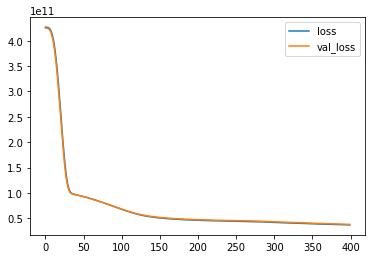

In [14]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [15]:
	
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))


68/68 [==============================] - 0s 1ms/step
119926.44161716399
194989.58752097643
